# week7 拼多多优惠券使用行为预测

## 1.数据概况分析

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif']=['simhei']

In [2]:
pdd=pd.read_csv('C:\\Users\mac\Desktop\数据分析班\week7\拼多多优惠券数据.csv')

In [3]:
pdd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25317 entries, 0 to 25316
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          25317 non-null  int64 
 1   age                         25317 non-null  int64 
 2   job                         25317 non-null  object
 3   marital                     25317 non-null  object
 4   default                     25317 non-null  object
 5   returned                    25317 non-null  object
 6   loan                        25317 non-null  object
 7   coupon_used_in_last6_month  25317 non-null  int64 
 8   coupon_used_in_last_month   25317 non-null  int64 
 9   coupon_ind                  25317 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 1.9+ MB


    ·没有缺失值
    ·default，returned和loan需要转化为数字变量，以便以后的分析

In [4]:
pdd.head()

,ID,age,job,marital,default,returned,loan,coupon_used_in_last6_month,coupon_used_in_last_month,coupon_ind
0,1,43,management,married,no,yes,no,2,0,0
1,2,42,technician,divorced,no,yes,no,1,1,0
2,3,47,admin.,married,no,yes,yes,2,0,0
3,4,28,management,single,no,yes,yes,2,0,0
4,5,42,technician,divorced,no,yes,no,5,0,0


In [5]:
pdd.describe()

,ID,age,coupon_used_in_last6_month,coupon_used_in_last_month,coupon_ind
count,25317.000000,25317.000000,25317.000000,25317.000000,25317.000000
mean,12659.000000,40.935379,2.772050,0.292847,0.116957
std,7308.532719,10.634289,3.136097,0.765498,0.321375
min,1.000000,18.000000,1.000000,0.000000,0.000000
25%,6330.000000,33.000000,1.000000,0.000000,0.000000
50%,12659.000000,39.000000,2.000000,0.000000,0.000000
75%,18988.000000,48.000000,3.000000,0.000000,0.000000
max,25317.000000,95.000000,55.000000,15.000000,1.000000


    ·age中最大值95有异常的可能

## 2.单变量分析

### 2.1年龄

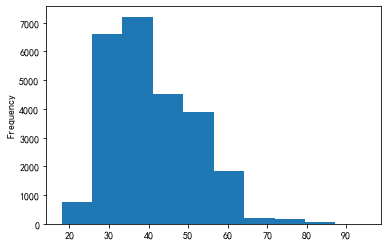

In [6]:
pdd['age'].plot(kind='hist');

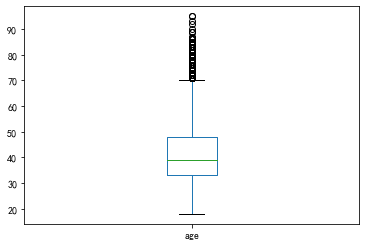

In [7]:
pdd['age'].plot(kind='box');

    ·age在年龄较大的部分有离群的异常值存在

In [8]:
des_age=pdd['age'].describe()
IQR_age=des_age['75%']-des_age['25%']
max_age_should=des_age['75%']+1.5*IQR_age
max_age_should

70.5

In [9]:
pdd[pdd['age']>max_age_should]

,ID,age,job,marital,default,returned,loan,coupon_used_in_last6_month,coupon_used_in_last_month,coupon_ind
114,115,74,retired,married,no,no,no,3,0,0
187,188,79,retired,divorced,no,no,no,2,0,0
211,212,80,retired,divorced,no,no,no,8,0,0
284,285,75,retired,divorced,no,no,no,1,0,0
418,419,81,retired,divorced,no,no,no,1,0,0
...,...,...,...,...,...,...,...,...,...,...
25182,25183,72,retired,married,no,no,no,4,0,1
25195,25196,77,retired,married,no,no,no,1,0,1
25203,25204,78,retired,divorced,no,no,no,1,0,1
25241,25242,72,retired,married,no,no,no,2,0,1


    ·比例较小，可以除去

In [10]:
pdd=pdd[pdd['age']<max_age_should]

### 2.2婚姻状况

In [11]:
pdd['marital'].value_counts()

married     15035
single       7148
divorced     2850
Name: marital, dtype: int64

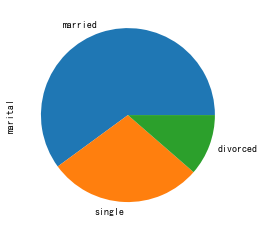

In [12]:
pdd['marital'].value_counts().plot(kind='pie');

    ·多数人是已婚的，其次是单身

### 2.3职业

In [13]:
pdd['job'].value_counts()

blue-collar      5455
management       5287
technician       4239
admin.           2906
services         2342
retired          1026
self-employed     881
entrepreneur      855
unemployed        701
housemaid         650
student           533
unknown           158
Name: job, dtype: int64

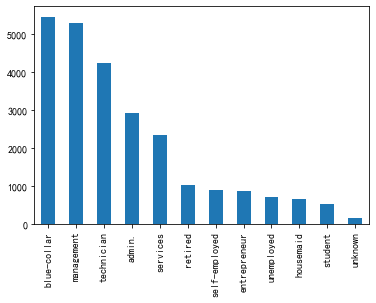

In [14]:
pdd['job'].value_counts().plot(kind='bar');

    ·使用拼多多的人中蓝领、管理层和从事技术工作的人占比较大

## 3.相关与可视化分析

### 3.1 数据预处理

In [15]:
dummy=pdd[['ID','default','returned','loan']]
dummy.head()

,ID,default,returned,loan
0,1,no,yes,no
1,2,no,yes,no
2,3,no,yes,yes
3,4,no,yes,yes
4,5,no,yes,no


In [16]:
dummy=pd.get_dummies(dummy)
dummy.head()

,ID,default_no,default_yes,returned_no,returned_yes,loan_no,loan_yes
0,1,1,0,0,1,1,0
1,2,1,0,0,1,1,0
2,3,1,0,0,1,0,1
3,4,1,0,0,1,0,1
4,5,1,0,0,1,1,0


In [17]:
dummy.drop(['default_no','returned_no','loan_no'],axis=1,inplace=True)
dummy.head()

,ID,default_yes,returned_yes,loan_yes
0,1,0,1,0
1,2,0,1,0
2,3,0,1,1
3,4,0,1,1
4,5,0,1,0


In [18]:
tmp=pd.DataFrame.merge(pdd,dummy)
tmp.head()

,ID,age,job,marital,default,returned,loan,coupon_used_in_last6_month,coupon_used_in_last_month,coupon_ind,default_yes,returned_yes,loan_yes
0,1,43,management,married,no,yes,no,2,0,0,0,1,0
1,2,42,technician,divorced,no,yes,no,1,1,0,0,1,0
2,3,47,admin.,married,no,yes,yes,2,0,0,0,1,1
3,4,28,management,single,no,yes,yes,2,0,0,0,1,1
4,5,42,technician,divorced,no,yes,no,5,0,0,0,1,0


In [19]:
tmp.drop(['default','returned','loan'],axis=1,inplace=True)
tmp.head()

,ID,age,job,marital,coupon_used_in_last6_month,coupon_used_in_last_month,coupon_ind,default_yes,returned_yes,loan_yes
0,1,43,management,married,2,0,0,0,1,0
1,2,42,technician,divorced,1,1,0,0,1,0
2,3,47,admin.,married,2,0,0,0,1,1
3,4,28,management,single,2,0,0,0,1,1
4,5,42,technician,divorced,5,0,0,0,1,0


In [20]:
pdd_new=tmp
pdd_new.head()

,ID,age,job,marital,coupon_used_in_last6_month,coupon_used_in_last_month,coupon_ind,default_yes,returned_yes,loan_yes
0,1,43,management,married,2,0,0,0,1,0
1,2,42,technician,divorced,1,1,0,0,1,0
2,3,47,admin.,married,2,0,0,0,1,1
3,4,28,management,single,2,0,0,0,1,1
4,5,42,technician,divorced,5,0,0,0,1,0


### 3.2 概览

In [21]:
summary=pdd_new.groupby('coupon_ind')
summary.mean()

,ID,age,coupon_used_in_last6_month,coupon_used_in_last_month,default_yes,returned_yes,loan_yes
coupon_ind,,,,,,,
0,11178.739888,40.569859,2.862175,0.25840,0.019007,0.583776,0.170165
1,23841.391028,40.207700,2.128223,0.53338,0.008831,0.371953,0.098552


In [22]:
summary.std()

,ID,age,coupon_used_in_last6_month,coupon_used_in_last_month,default_yes,returned_yes,loan_yes
coupon_ind,,,,,,,
0,6452.779974,9.751967,3.262437,0.743319,0.136554,0.492943,0.375786
1,854.524900,11.526063,1.898340,0.866045,0.093573,0.483411,0.298112


    ·由以上数据可以看出
    年龄对是否会使用优惠券的影响差距不大
    过去六个月使用优惠券多的用户本次可能不使用优惠券的更多，而过去一个月使用优惠券多的本次更可能使用优惠券
    有过违约、退货和信用卡付款的更多的预计在本次活动中不会使用优惠券

### 3.3 婚姻状况

In [23]:
pdd_new.groupby('coupon_ind')['marital'].value_counts()

coupon_ind  marital 
0           married     13567
            single       6102
            divorced     2533
1           married      1468
            single       1046
            divorced      317
Name: marital, dtype: int64

<AxesSubplot:xlabel='count', ylabel='marital'>

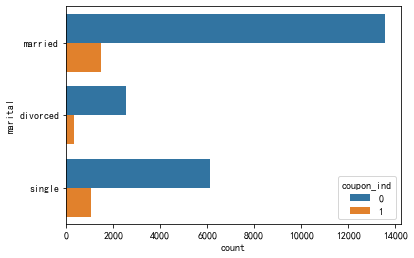

In [24]:
sns.countplot(y='marital',hue='coupon_ind',data=pdd_new)

    ·可以看出已婚的人多为不使用优惠券的人

### 3.4 职业

In [25]:
pdd_new.groupby('coupon_ind')['job'].value_counts()

coupon_ind  job          
0           blue-collar      5068
            management       4555
            technician       3759
            admin.           2566
            services         2131
            retired           843
            entrepreneur      788
            self-employed     778
            housemaid         597
            unemployed        587
            student           390
            unknown           140
1           management        732
            technician        480
            blue-collar       387
            admin.            340
            services          211
            retired           183
            student           143
            unemployed        114
            self-employed     103
            entrepreneur       67
            housemaid          53
            unknown            18
Name: job, dtype: int64

<AxesSubplot:xlabel='count', ylabel='job'>

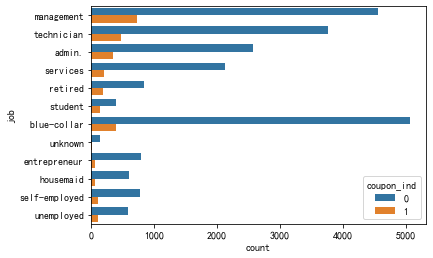

In [26]:
sns.countplot(y='job',hue='coupon_ind',data=pdd_new)

    ·可以看出蓝领、管理层和技术工作人员中不使用优惠券的人群的占比较大

### 3.5 相关性分析

In [27]:
pdd_new.corr()[['coupon_ind']].sort_values('coupon_ind',ascending=False)

,coupon_ind
coupon_ind,1.000000
ID,0.550376
coupon_used_in_last_month,0.114116
age,-0.011506
default_yes,-0.024337
loan_yes,-0.061545
coupon_used_in_last6_month,-0.073873
returned_yes,-0.135141


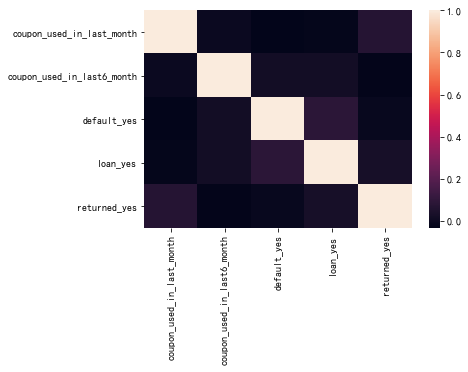

In [28]:
q1=['coupon_used_in_last_month','coupon_used_in_last6_month','default_yes','loan_yes','returned_yes']
sns.heatmap(pdd_new[q1].corr());

    ·由上可知：
    本次是否会使用优惠券的预测结果与过去一个月使用优惠券的次数正相关
    与是否违约、退货、使用信用卡付款和过去六个月使用优惠券的次数负相关

## 4.逻辑回归

### 4.1 建立模型

In [29]:
y=pdd_new['coupon_ind']
x=pdd_new[['coupon_used_in_last_month','coupon_used_in_last6_month','default_yes','loan_yes','returned_yes']]

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

In [31]:
from sklearn import linear_model as lrmd
lr=lrmd.LogisticRegression()

In [32]:
lr.fit(x_train,y_train)

LogisticRegression()

In [33]:
lr.intercept_

array([-1.2524545])

In [34]:
lr.coef_

array([[ 0.44012769, -0.18450179, -0.66809835, -0.59855371, -0.95154737]])

    ·与3.5中的结果一致

In [35]:
y_pred_train=lr.predict(x_train)
y_pred_test=lr.predict(x_test)
print(y_pred_train)

[0 0 0 ... 0 0 0]


### 4.2 模型评估

In [36]:
# 计算训练集的准确度
import sklearn.metrics as metrics
metrics.accuracy_score(y_train,y_pred_train)

0.8861496319123437

In [37]:
#计算测试集准确率
metrics.accuracy_score(y_test,y_pred_test)

0.8868175765645806

    ·比训练集准确度稍高

### 4.3 模型优化

####  调整参数

In [38]:
x_1_train,x_1_test,y_1_train,y_1_test=train_test_split(x,y,test_size=0.5,random_state=100)
mod=lr.fit(x_1_train,y_1_train)
mod

LogisticRegression()

In [39]:
lr.intercept_

array([-1.26135287])

In [40]:
lr.coef_

array([[ 0.43023751, -0.19497695, -0.57867384, -0.54953283, -0.8943783 ]])

In [41]:
y_1_pred_train=lr.predict(x_1_train)
y_1_pred_test=lr.predict(x_1_test)
print(y_1_pred_train)

[0 0 0 ... 0 0 0]


In [42]:
metrics.accuracy_score(y_1_train,y_1_pred_train)

0.8874240971556407

In [43]:
metrics.accuracy_score(y_1_test,y_1_pred_test)

0.8858352640409044

    ·训练集准确度上升，测试集准确度下降，说明0.3比0.5更好

## 5.业务解读与结论

### 根据测试集数量为30%时候的数据：

    coupon_used_in_last_month,coupon_used_in_last6_month,default_yes,loan_yes,returned_yes五个变量的回归系数分别为0.43329545, -0.16767374, -0.53899875, -0.53307719, -0.98864659

In [44]:
import numpy as np

In [45]:
np.exp([[ 0.43329545, -0.16767374, -0.53899875, -0.53307719, -0.98864659]])

array([[1.54233184, 0.84562968, 0.58333202, 0.5867965 , 0.37207993]])

    根据系数解读：
    过去一个月使用过优惠券的用户，在本次活动使用优惠券的可能性是近一个月没有使用优惠券的 1.54 倍
    而过去一个月使用过优惠券以及有过违约、信用卡支付、退货的用户，在本次活动中使用优惠券的可能性不如没有的

### 业务建议

    为在一个月内没使用优惠券的用户提供高折扣的优惠券